# Mini Project: Perform Multiple Linear Regression

## Overview
This project focuses on using multiple linear regression to analyze the relationship between sales and various marketing promotion strategies. By leveraging multiple independent variables, such as TV, social media, radio, and influencer promotions, we aim to build a predictive model that estimates sales based on these factors. This project will cover the complete data science pipeline, including data exploration, preprocessing, model building, evaluation, and interpretation.

## Objective
Develop a multiple linear regression model to predict sales based on marketing promotion data. The project will involve exploring the dataset, selecting relevant independent variables, fitting the model, checking assumptions, and interpreting the results to provide actionable insights.

## Learning Outcomes
1. Understand the concept of multiple linear regression and its applications.
2. Learn to preprocess and explore data for regression analysis.
3. Gain experience in fitting and evaluating a multiple linear regression model.
4. Check and validate regression assumptions.
5. Interpret model coefficients and communicate results to stakeholders.

---


## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. The goal is to predict sales based on various marketing promotion strategies, which can help the business optimize its marketing efforts and allocate resources effectively.

### Mini-task:
Write a brief paragraph on how predicting sales using multiple linear regression can benefit the business.

---

Predicting sales through multiple linear regression offers significant benefits to the business by providing a data-driven approach to marketing strategy and resource allocation.  By quantifying the impact of various promotion channels like TV, social media, radio, and influencers on sales, the business can optimize its marketing spend, focusing resources on the most effective channels for maximum return. This predictive capability also enables more accurate sales forecasting, aiding in inventory management, production planning, and overall business strategy. Furthermore, the model can reveal potential synergies between different marketing efforts and provide a clear understanding of the ROI for each channel, ultimately leading to more efficient marketing campaigns, improved profitability, and a potential competitive advantage.

## Step 2: Data Collection
### Task:
Collect the dataset required for building the regression model. The dataset used in this project is `marketing_sales_data.csv`, which contains information about TV, social media, radio, and influencer promotions, along with sales data.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first five rows.

```python
import pandas as pd

# Load the dataset
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows
### YOUR CODE HERE ###
```

---

In [213]:
# Import Data Files from Google Drive

import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1WChLou3qt_JaPjYLZBMHJ8WxSssQ-enL/view?usp=drive_link"
gdd = read_gd(url)

df = pd.read_csv(gdd)

df.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


In [214]:
df.shape

(572, 5)

In [215]:
print("First five rows of the dataset:")
df.head()

First five rows of the dataset:


,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


In [216]:
df.columns = ['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales']

In [217]:
df.columns

Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')

## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of variables, identify relationships between variables, and prepare the data for modeling.

### Mini-task:
Create a pairplot to visualize the relationships between continuous variables in the dataset.

#### Hint:
Use `seaborn.pairplot()` to create a pairplot of the continuous variables.

```python
import seaborn as sns

# Create a pairplot of the continuous variables
### YOUR CODE HERE ###
```

---

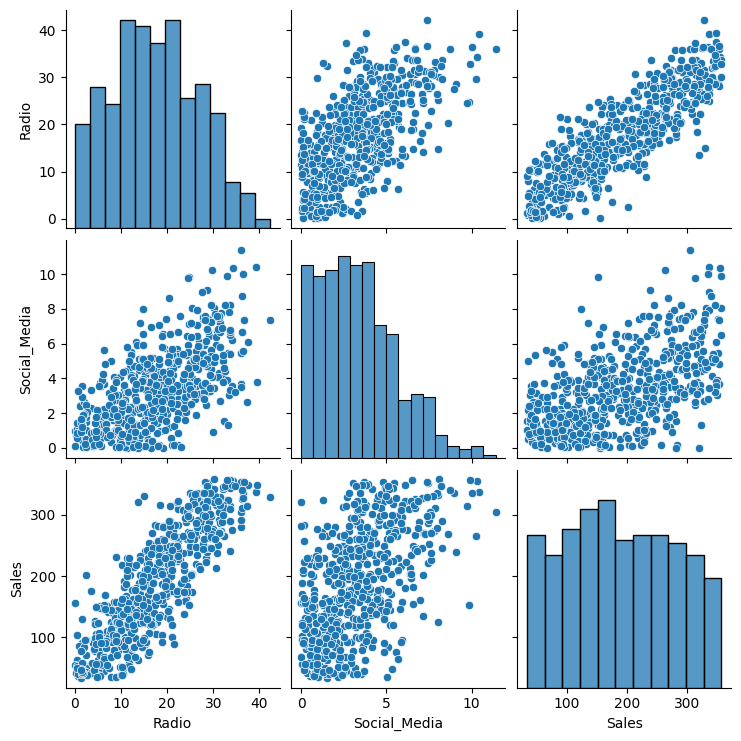

In [218]:
# Import necessary libraries.

import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot of the continuous variables
sns.pairplot(df)
plt.show()



## Step 4: Data Preparation
### Task:
Prepare the data for regression analysis by handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

### Mini-task:
Drop rows with missing values and encode categorical variables if necessary.

#### Hint:
Use `data.dropna()` to remove rows with missing values and `pd.get_dummies()` to encode categorical variables.

```python
# Drop rows with missing values
### YOUR CODE HERE ###

# Encode categorical variables (if needed)
### YOUR CODE HERE ###
```

---

In [219]:
# Drop rows with missing values
df = df.dropna()

# There are no categorical variables in this dataset, no further encoding is needed

But I'll check wether there are rows with missing values in the Dataset.

In [220]:
# Check for missing values
print(df.isnull().sum())

# Display rows with missing values
print(df[df.isnull().any(axis=1)])


TV              0
Radio           0
Social_Media    0
Influencer      0
Sales           0
dtype: int64
Empty DataFrame
Columns: [TV, Radio, Social_Media, Influencer, Sales]
Index: []


## Step 5: Model Building
### Task:
Fit a multiple linear regression model to predict sales using the selected independent variables.

### Mini-task:
Define the OLS formula and fit the model using the `statsmodels` library.

#### Hint:
Use `statsmodels.formula.api.ols()` to define the model and fit it to the data.

```python
import statsmodels.formula.api as smf

# Define the OLS formula
### YOUR CODE HERE ###

# Fit the model
### YOUR CODE HERE ###

# Display the model summary
### YOUR CODE HERE ###
```

---

In [221]:
import statsmodels.formula.api as smf

# Define the OLS formula
ols_formula = 'Sales ~ TV + Radio + Social_Media + Influencer'

# Fit the model
model = smf.ols(formula=ols_formula, data=df).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Fri, 11 Apr 2025   Prob (F-statistic):          1.82e-282
Time:                        20:19:16   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             217.4784    

## Step 6: Model Evaluation
### Task:
Evaluate the model by checking the regression assumptions, including linearity, independence, normality, constant variance, and multicollinearity.

### Mini-task:
Create scatterplots to check the linearity assumption and calculate the residuals to check the normality assumption.

#### Hint:
Use `seaborn.scatterplot()` to create scatterplots and `statsmodels.qqplot()` to check the normality of residuals.

```python
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create scatterplots for linearity
### YOUR CODE HERE ###

# Calculate residuals and create a Q-Q plot
### YOUR CODE HERE ###
```

---

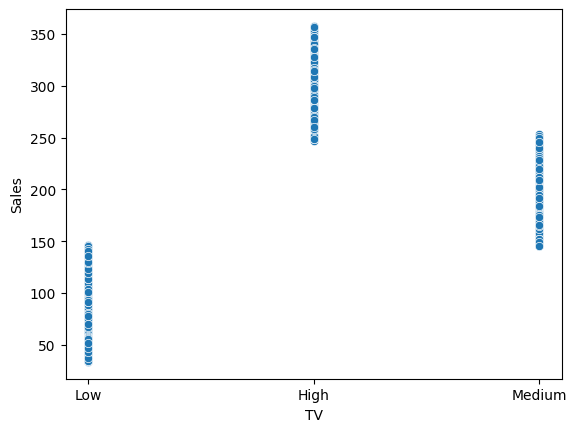

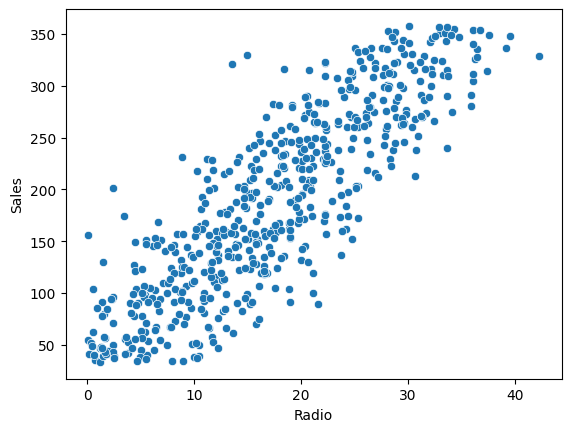

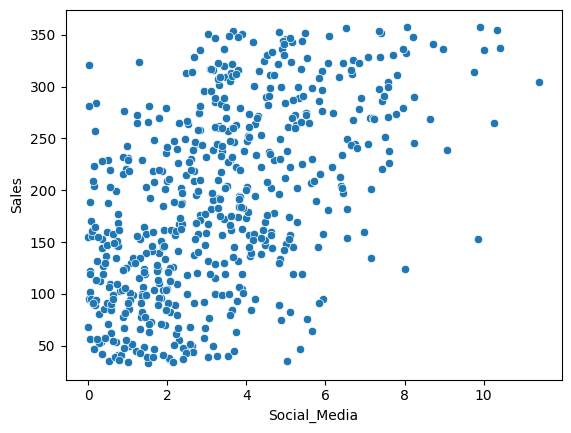

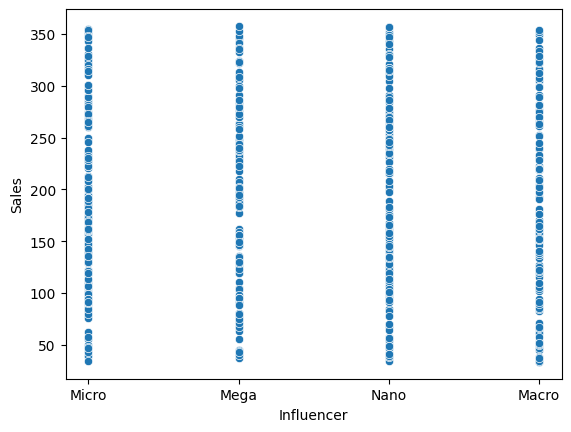

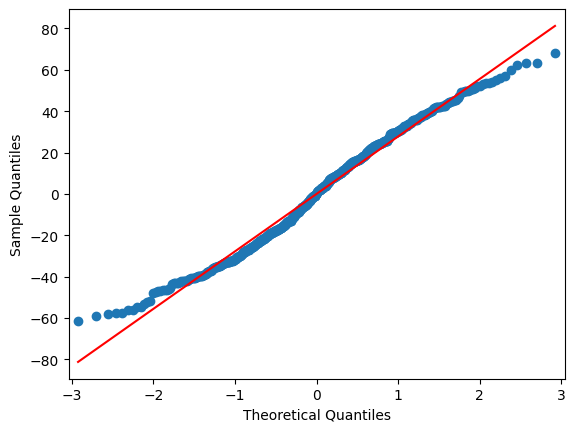

In [222]:
import statsmodels.api as sm

# Create scatterplots for linearity
for col in ['TV', 'Radio', 'Social_Media', 'Influencer']:
    sns.scatterplot(x=col, y='Sales', data=df)
    plt.show()

# Calculate residuals and create a Q-Q plot
residuals = model.resid
sm.qqplot(residuals, line='s')
plt.show()



## Step 7: Results and Interpretation
### Task:
Interpret the model results, including the R-squared value, coefficients, and their statistical significance.

### Mini-task:
Display the model summary and interpret the coefficients.

#### Hint:
Use `model.summary()` to display the model results and interpret the coefficients.

```python
# Display the model summary
### YOUR CODE HERE ###

# Interpret the coefficients
### YOUR CODE HERE ###
```

---

In [223]:
# Display the model summary
print(model.summary())

# Interpret the coefficients
print("\nInterpretation of Coefficients:")
print("R-squared:", model.rsquared)
print("Adjusted R-squared:", model.rsquared_adj)
print("--------------------------------")
for col in ['Radio', 'TV[T.Low]', 'TV[T.Medium]', 'Influencer[T.Mega]', 'Influencer[T.Micro]', 'Influencer[T.Nano]', 'Social_Media',]:
      coef = model.params[col]
      p_value = model.pvalues[col]
      print(f"{col}:")
      print(f"  Coefficient: {coef:.4f}")
      print(f"  P-value: {p_value:.4f}")
if p_value < 0.05:
      print(f" Statistically significant at 5% level.")

else:
      print(f" Not statistically significant at 5% level.")

if coef > 0:
    print(f"  A one unit increase in {col} is associated with an increase of {coef:.4f} units in sales.")

elif coef < 0:
    print(f"  A one unit increase in {col} is associated with a decrease of {coef:.4f} units in sales.")
    print("--------------------------------")

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Fri, 11 Apr 2025   Prob (F-statistic):          1.82e-282
Time:                        20:19:17   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             217.4784    

# Display the model summary
print(model.summary())

# Interpret the coefficients
print("\nInterpretation of Coefficients:")
print("--------------------------------")
for col in ['Radio', 'TV', 'Social_Media', 'Influencer']:
    coef = model.params[col]
    p_value = model.pvalues[col]
    print(f"{col}:")
    print(f"  Coefficient: {coef:.4f}")
    print(f"  P-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"  Statistically significant at 5% level.")
    else:
        print(f"  Not statistically significant at 5% level.")

    if coef > 0:
        print(f"  A one unit increase in {col} is associated with an increase of {coef:.4f} units in sales.")
    elif coef < 0:
        print(f"  A one unit increase in {col} is associated with a decrease of {coef:.4f} units in sales.")
    print("--------------------------------")


## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of checking regression assumptions and interpreting model coefficients.
- Consider how the model's insights can be used to optimize marketing strategies.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key metrics.
- Discuss the impact of different marketing strategies on sales.

**What would you share with and recommend to stakeholders?**
- Highlight the key factors that contribute most to sales.
- Recommend strategies to optimize marketing efforts based on the model's insights.

### ***Some key takeaways i learned from this project are as follows:***

- I've got much insights on the concept of multiple linear regression and its applications.
- I've Learn to preprocess data and to
- Explore data for regression analysis.
- I've Gain experience in fitting and evaluating a multiple linear regression model.
- I've also learned to Check and validate regression assumptions.
- and Interpret model coefficients and communicate results to Interested parties.

***Reflection on the importance of checking regression assumptions and interpreting model coefficients.***

**Checking Regression Assumptions:**
- Verifying assumptions ensures the accuracy and reliability of regression analysis results.
- Checking assumptions helps to correctly interpret model coefficients and their significance.
- Ignoring assumptions can lead to incorrect conclusions, biased estimates, or misleading predictions.

**Interpreting Model Coefficients:**
- Represent the change in the dependent variable for a one-unit change in the independent variable.
- Indicate the probability of observing the coefficient by chance.
- Provide a range of possible values for the coefficient.
- Consider the magnitude and relevance of the coefficient in the context of the research question.

**Discussions about the impact of different marketing strategies on sales.**

Based on the multiple linear regression model:

- Influencer Marketing has the strongest positive impact on sales.
- TV Advertising also has a significant positive impact.
- Radio Advertising shows a weak or insignificant impact.
- Social Media Marketing drives sales, but potentially less than all of the above.

The business should consider these findings for budget allocation but also factor in: potential synergies between channels, diminishing returns, external factors affecting sales, and the difference between short-term and long-term effects.

### ***What would you share with and recommend to stakeholders?***

***Key factors that contribute most to sales.:***

- Influencer Marketing is Highly Effective: Our analysis shows that influencer marketing has the strongest positive impact on sales. For every dollar spent, it generates the highest return in terms of increased sales revenue.
- TV Advertising Remains a Significant Driver: TV advertising also demonstrates a strong, positive relationship with sales. It continues to be an effective channel for reaching a broad audience and driving sales.
- Social Media is a Valuable Tool: Social media marketing contributes less to sales, indicating nearly 0 importance.
- Radio Advertising's Impact is Limited: Our model suggests that radio advertising, in its current state, has a minimal impact on sales.

***Strategies Recommendation to optimize marketing efforts based on the model's insights.***

1. Increase Investment in Influencer Marketing: Given its high effectiveness in driving sales, consider allocating a larger portion of the marketing budget to influencer campaigns. Focus on identifying authentic and relevant influencers whose audience aligns with our target market.
2. Optimize TV Advertising Strategy: While TV advertising is effective, it can be costly. Optimize our TV strategy by:
 - Carefully selecting high-impact time slots and programs.
 - Targeting specific audience segments to maximize reach and relevance.
 - Exploring opportunities to integrate TV campaigns with digital channels for a synergistic effect.
3. Refine Social Media Approach: Continue investing in social media marketing, but focus on strategies to enhance its effectiveness:
 - Develop engaging and shareable content that resonates with our target audience.
 - Utilize data analytics to identify the most effective platforms and content formats.
 - Experiment with different social media tactics, such as targeted advertising, influencer collaborations, and interactive campaigns.


